## Import 

In [64]:
# Python built-in libraries
from pathlib import Path

# Core Math and Visualization Libraries
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# sci-kit (sklearn) is a Machine Learning Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## Step 1. Load the dataset

In [65]:
# In this cell, we use a built-in Python library to specify paths:

# CWD stands for current working directory
CWD = Path.cwd()
dataset_filepath = CWD.joinpath('dataset', 'german_dataset.csv')

In [66]:
# Initialize lists to store the data
typ_list = []
nachricht_list = []

# Open the file and read it line by line
with open(dataset_filepath, 'r', encoding='UTF-8') as file:
    # Optionally skip the header if your file has one
    next(file) 
    for line in file:
        # Remove any leading/trailing whitespace characters
        line = line.strip()
        # Skip empty lines
        if not line:
            continue
        # Split the line on the first semicolon
        split_line = line.split(';', 1)
        # If the line doesn't contain a semicolon, handle accordingly
        if len(split_line) == 2:
            typ, nachricht = split_line
        else:
            typ = split_line[0]
            nachricht = ''
        # Remove any extra whitespace from the fields
        typ = typ.strip()
        nachricht = nachricht.strip()
        # Append the data to the lists
        typ_list.append(typ)
        nachricht_list.append(nachricht)

# Create a DataFrame from the lists
data = pd.DataFrame({
    'Typ': typ_list,
    'Nachricht': nachricht_list
})

# Display the first few rows to verify
data.head()

,Typ,Nachricht
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ..."
1,Etat,App sei nicht so angenommen worden wie geplant...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,..."
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...


In [67]:
types_of_values = data['Typ'].value_counts()

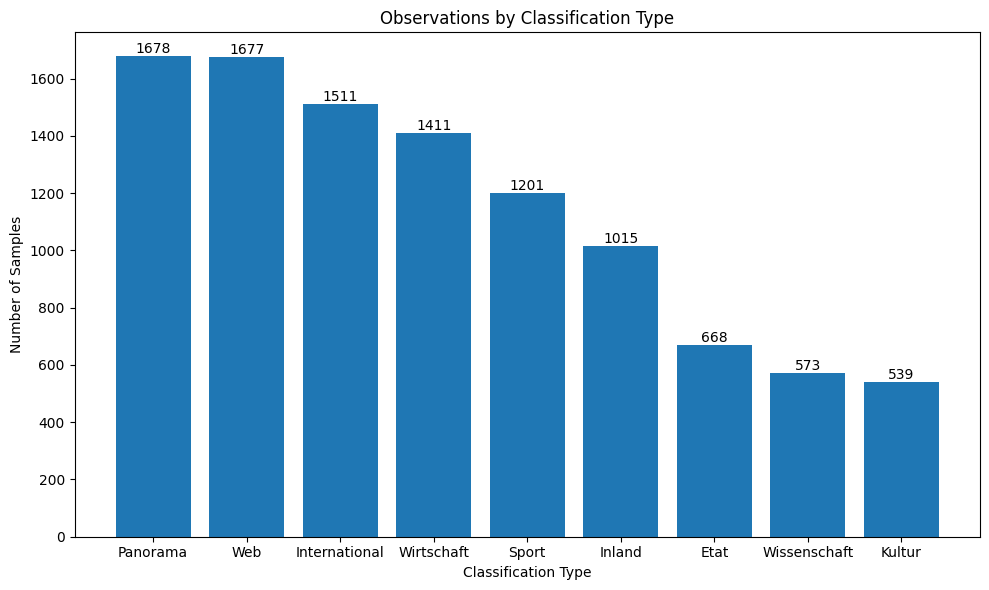

In [68]:
label_counts = data['Typ'].value_counts()

labels = label_counts.index
counts = label_counts.values

plt.figure(figsize=(10, 6))  # Increase figure size
plt.bar(labels, counts)

plt.title("Observations by Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Samples")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

## Step 2. Preprocess the dataset and extract features using Bag of Words

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data['Nachricht'], data['Typ'], test_size=0.2, random_state=42, )

In [70]:
import string

def preprocess_text(text: str) -> str:
    """
    This method processes a text by lower the letters, removing punctuation, removing stopwords, and lemmatizing the words.

    """
    
    lowercase_text = text.lower()
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation))
    split_text = lowercase_text.split()

    stop_words = set(stopwords.words('german'))
    filtered_words = [word for word in split_text if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

In [71]:
preprocessed_X_train = X_train.apply(preprocess_text)
preprocessed_X_test = X_test.apply(preprocess_text)

In [72]:
def create_bag_of_words_model(preprocessed_X_train):
    """
    This method creates a bag of words model from a preprocessed text.

    """
    
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer
    

def create_tfidf_model(preprocessed_X_train):
    """
    This method creates a tfidf model from a preprocessed text.

    """
    
    vectorizer = TfidfVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer


In [73]:
x_train, vectorizer = create_bag_of_words_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3. Train the model

In [74]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [75]:
model = train_model(x_train, y_train)

## Step 4. Evaluate the model

In [76]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [77]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [78]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.81


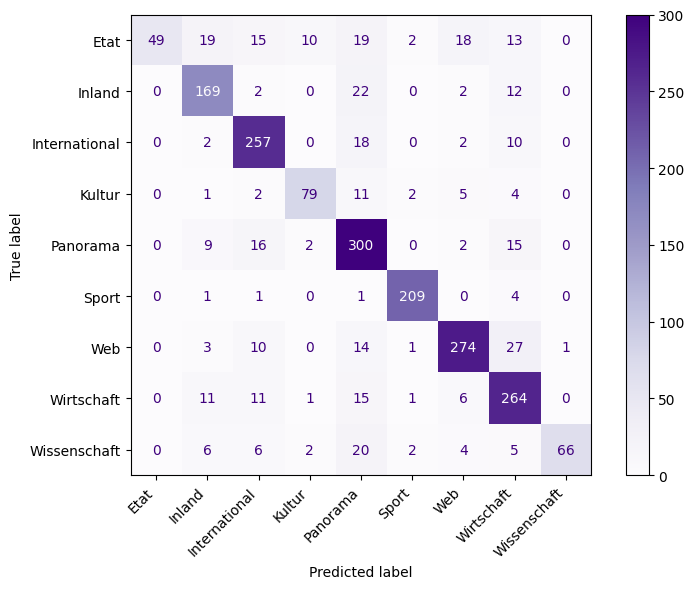

In [79]:
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_)

# Create a larger figure to accommodate labels
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix on the specified axes
disp.plot(ax=ax, cmap='Purples')

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

## Step 2 - Using TF IDF vectors to extract features

In [80]:
x_train, vectorizer = create_tfidf_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3. Train the model

In [81]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [82]:
model = train_model(x_train, y_train)

## Step 4. Evaluate the model

In [83]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [84]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [85]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.68


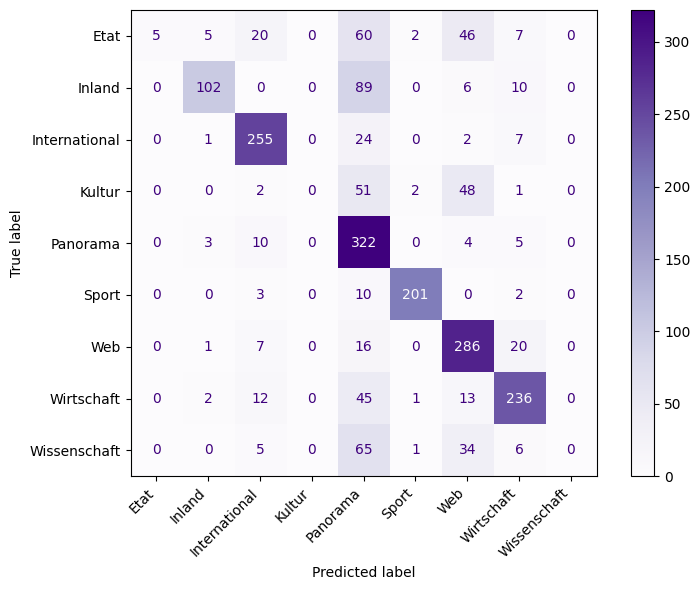

In [86]:
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_)

# Create a larger figure to accommodate labels
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix on the specified axes
disp.plot(ax=ax, cmap='Purples')

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()